In [ ]:
'''
                                     MA374 | Lab 08
                        Deepak Kumar Gouda | 160123054
'''

In [1]:
import numpy as np
from pandas import read_csv

In [2]:
from scipy.stats import norm

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
def getS0(name='', market='BSE', index=False):
    fields=['Close']
    if index:
        data = read_csv('./Data/'+market.lower()+'data1.csv', usecols=fields, index_col=False)
    else:
        data = read_csv('./Data/'+market+'Data/'+name+'.csv', usecols=fields, index_col=False)
    return data.iloc[-1]['Close']

In [6]:
def getHistoricalVolatility(data):
    close = np.array(data['Close'])
    change = np.zeros(len(close)-1)
    for i in range(1, len(close)):
        change[i-1] = (close[i]-close[i-1])/close[i-1]
    historicalVolatility = np.std(change)*(252**0.5)
    return historicalVolatility

In [7]:
def getCall(S, K, r, t, sig):
    d1 = (np.log(S/K)+t*(r+(sig**2)/2))/(sig*(t**0.5))
    d2 = d1-sig*(t**0.5)
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    C = S*Nd1 - K*np.exp(-r*t)*Nd2
    return C

In [8]:
def getPut(S, K, r, t, sig):
    d1 = (np.log(S/K)+t*(r+(sig**2)/2))/(sig*(t**0.5))
    d2 = d1-sig*(t**0.5)
    Nd1 = norm.cdf(-d1)
    Nd2 = norm.cdf(-d2)
    P = K*np.exp(-r*t)*Nd2 - S*Nd1
    return P

In [9]:
def model(name='', market='BSE', index=False, num_fig=0):
    fields=['Close']
    if index:
        data = read_csv('./Data/'+market.lower()+'data1.csv', usecols=fields, index_col=False)
    else:
        data = read_csv('./Data/'+market+'Data/'+name+'.csv', usecols=fields, index_col=False)
    
    if(index):
        print('\t\t'+market+'Index')
    else:
        print('\t\tStock : '+stock+' Market : '+market)
    ##################Q1####################
    lastMonth = data.iloc[len(data)-21:]
    sig = getHistoricalVolatility(lastMonth)
    print("Historical Volatility = ", sig)
    
    ##################Q2####################
    S0 = data.iloc[-1]['Close']
    A = np.arange(0.5, 1.6, 0.1)
    K = S0
    r = 0.05
    t = 126/252
    
    callPrice = np.zeros(len(A))
    putPrice = np.zeros(len(A))
    
    for i, a in enumerate(A):
        callPrice[i] = getCall(S0, a*K, r, t, sig)
        putPrice[i] = getPut(S0, a*K, r, t, sig)
    
    print('Call Price = ', end='')
    print(np.round(callPrice, 2))
    print('Put Price = ', end='')
    print(np.round(putPrice, 2))
    print('\n')
        
    ##################Q3###################
    S0 = data.iloc[-1]['Close']
    A = 1
    K = A*S0
    r = 0.05
    t = 126/252
    T = 21
    start = len(data)-T
    volatility = []
    callPrices = []
    putPrices = []
    
    while(start >= 0):
        monthlyData = data[start:-1]
        sig = getHistoricalVolatility(monthlyData)
        volatility.append(sig)
        C = getCall(S0, K, r, t, sig)
        P = getPut(S0, K, r, t, sig)
        callPrices.append(C)
        putPrices.append(P)
        start = start-T
        
    x = np.arange(1, len(volatility)+1)
    y = np.array(volatility)
    z_call = np.array(callPrices)
    z_put = np.array(putPrices)
    
    fig = plt.figure()
    ax = fig.add_subplot(111+num_fig, projection='3d')
    ax.scatter(x, y, z_call, c='b', marker='o', label='Call Option')
    ax.scatter(x, y, z_put, c='r', marker='o', label='Put Option')

    ax.set_xlabel('Time (in number of months)')
    ax.set_ylabel('Volatility')
    ax.set_zlabel('Option Prices')
    ax.legend()
    if index:
        plt.title(name+' Market = '+market)
    else:
        plt.title('Stock = '+name+' Market = '+market)
    plt.show()

In [10]:
stock_name=['ABB', 'AXISBANK', 'BALMLAWRIE', 'BHARTIARTL', 
          'CUMMINSIND', 'EMAMILTD', 'GODREJIND', 
          'HDFCBANK', 'HEROMOTOCO', 'HINDUNILVR', 
          'INFY', 'IOC', 'ITC', 'LUPIN', 'M&M', 
          'MAHABANK', 'NTPC', 'SBIN', 'SHREECEM', 'TCS']

In [11]:
market_name = ['BSE', 'NSE']

		BSEIndex
Historical Volatility =  0.15047750489169973
Call Price = [1.847943e+04 1.496165e+04 1.144400e+04 7.937370e+03 4.599660e+03
 1.998200e+03 6.061700e+02 1.276300e+02 1.932000e+01 2.210000e+00
 2.000000e-01]
Put Price = [0.000000e+00 0.000000e+00 1.300000e-01 1.128000e+01 1.913500e+02
 1.107670e+03 3.233420e+03 6.272660e+03 9.682130e+03 1.318280e+04
 1.669857e+04]




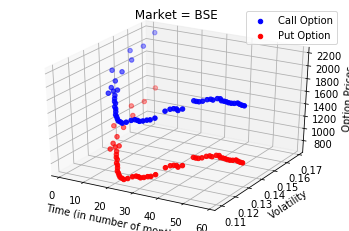

		NSEIndex
Historical Volatility =  0.14973524282252496
Call Price = [5.56537e+03 4.50594e+03 3.44654e+03 2.39033e+03 1.38426e+03 5.99610e+02
 1.80670e+02 3.76200e+01 5.61000e+00 6.30000e-01 6.00000e-02]
Put Price = [0.00000e+00 0.00000e+00 4.00000e-02 3.27000e+00 5.66300e+01 3.31410e+02
 9.71910e+02 1.88829e+03 2.91572e+03 3.97017e+03 5.02903e+03]




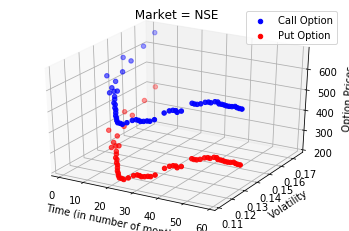

In [12]:
model('', 'BSE', index=True)
model('', 'NSE', index=True)

		Stock : ABB Market : BSE
Historical Volatility =  0.22043505289266346
Call Price = [6.8244e+02 5.5254e+02 4.2302e+02 2.9704e+02 1.8468e+02 9.9210e+01
 4.5800e+01 1.8350e+01 6.4900e+00 2.0600e+00 6.0000e-01]
Put Price = [0.0000e+00 1.0000e-02 4.0000e-01 4.3300e+00 2.1880e+01 6.6330e+01
 1.4283e+02 2.4528e+02 3.6334e+02 4.8882e+02 6.1727e+02]




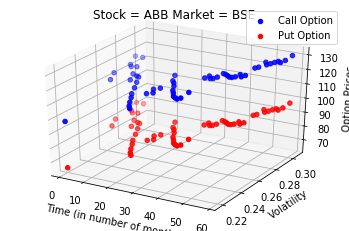

		Stock : AXISBANK Market : BSE
Historical Volatility =  0.2319184707177017
Call Price = [317.55 257.11 196.93 138.75  87.28  48.12  23.2    9.87   3.77   1.31
   0.42]
Put Price = [0.0000e+00 1.0000e-02 2.8000e-01 2.5500e+00 1.1530e+01 3.2820e+01
 6.8340e+01 1.1547e+02 1.6981e+02 2.2781e+02 2.8737e+02]




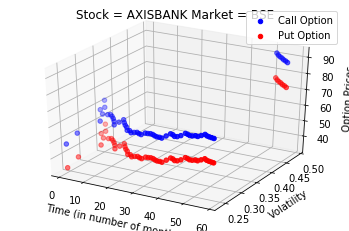

		Stock : BALMLAWRIE Market : BSE
Historical Volatility =  0.5141446576831114
Call Price = [104.8   86.22  69.2   54.29  41.76  31.59  23.59  17.43  12.77   9.31
   6.75]
Put Price = [  0.46   1.74   4.58   9.53  16.87  26.57  38.42  52.12  67.33  83.73
 101.03]




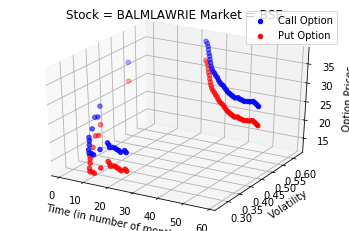

		Stock : BHARTIARTL Market : BSE
Historical Volatility =  0.386888799963
Call Price = [160.39 130.41 101.88  76.21  54.62  37.63  25.04  16.18  10.21   6.32
   3.85]
Put Price = [8.0000e-02 6.2000e-01 2.6000e+00 7.4500e+00 1.6370e+01 2.9900e+01
 4.7830e+01 6.9490e+01 9.4040e+01 1.2066e+02 1.4871e+02]




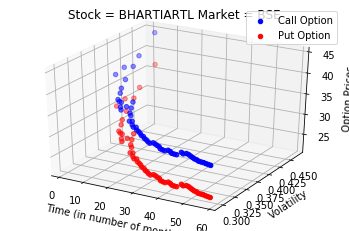

		Stock : CUMMINSIND Market : BSE
Historical Volatility =  0.333216257704825
Call Price = [434.9  352.67 272.94 199.74 137.68  89.53  55.21  32.51  18.42  10.1
   5.4 ]
Put Price = [4.0000e-02 6.0000e-01 3.6500e+00 1.3230e+01 3.3950e+01 6.8580e+01
 1.1704e+02 1.7712e+02 2.4580e+02 3.2027e+02 3.9834e+02]




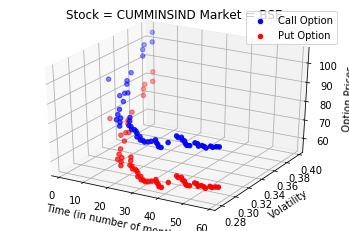

		Stock : EMAMILTD Market : BSE
Historical Volatility =  0.31778766748294185
Call Price = [214.27 173.68 134.11  97.52  66.4   42.34  25.42  14.47   7.88   4.13
   2.1 ]
Put Price = [1.0000e-02 2.0000e-01 1.4200e+00 5.6200e+00 1.5280e+01 3.2010e+01
 5.5880e+01 8.5720e+01 1.1992e+02 1.5696e+02 1.9572e+02]




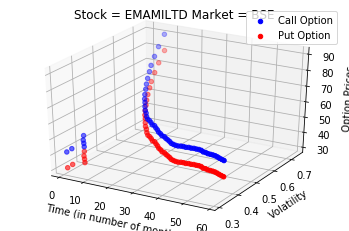

		Stock : GODREJIND Market : BSE
Historical Volatility =  0.23381713370724466
Call Price = [279.82 226.56 173.55 122.34  77.11  42.68  20.71   8.9    3.44   1.21
   0.4 ]
Put Price = [0.0000e+00 1.0000e-02 2.7000e-01 2.3300e+00 1.0360e+01 2.9200e+01
 6.0500e+01 1.0195e+02 1.4975e+02 2.0079e+02 2.5325e+02]




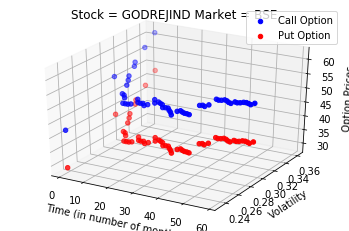

		Stock : HDFCBANK Market : BSE
Historical Volatility =  0.14773366367738122
Call Price = [1.08743e+03 8.80420e+02 6.73420e+02 4.66990e+02 2.69950e+02 1.16010e+02
 3.43100e+01 6.93000e+00 9.90000e-01 1.10000e-01 1.00000e-02]
Put Price = [0.0000e+00 0.0000e+00 1.0000e-02 5.7000e-01 1.0540e+01 6.3610e+01
 1.8891e+02 3.6853e+02 5.6960e+02 7.7572e+02 9.8263e+02]




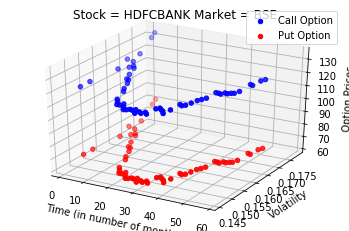

		Stock : HEROMOTOCO Market : BSE
Historical Volatility =  0.34260498848331994
Call Price = [1591.42 1290.99 1000.61  735.09  510.4   335.63  210.13  126.08   73.
   41.05   22.55]
Put Price = [2.30000e-01 2.70000e+00 1.52200e+01 5.26100e+01 1.30820e+02 2.58950e+02
 4.36350e+02 6.55210e+02 9.05030e+02 1.17598e+03 1.46038e+03]




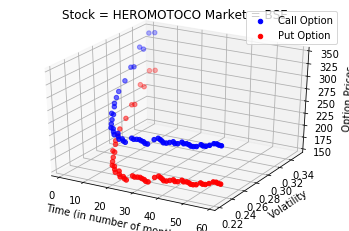

		Stock : HINDUNILVR Market : BSE
Historical Volatility =  0.23541954658753678
Call Price = [931.47 754.19 577.77 407.5  257.24 142.89  69.73  30.19  11.77   4.2
   1.39]
Put Price = [0.0000e+00 4.0000e-02 9.3000e-01 7.9800e+00 3.5040e+01 9.8000e+01
 2.0216e+02 3.3993e+02 4.9883e+02 6.6858e+02 8.4309e+02]




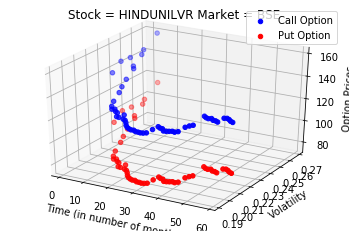

		Stock : INFY Market : BSE
Historical Volatility =  0.25836442452883546
Call Price = [338.07 273.76 210.02 149.27  96.38  56.02  29.37  14.02   6.17   2.54
   0.99]
Put Price = [0.0000e+00 4.0000e-02 6.6000e-01 4.2700e+00 1.5730e+01 3.9730e+01
 7.7440e+01 1.2644e+02 1.8295e+02 2.4367e+02 3.0647e+02]




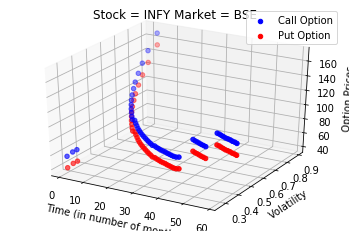

		Stock : IOC Market : BSE
Historical Volatility =  0.35362198620971746
Call Price = [70.26 57.02 44.28 32.68 22.88 15.23  9.7   5.94  3.52  2.03  1.15]
Put Price = [1.000e-02 1.500e-01 7.800e-01 2.550e+00 6.120e+00 1.185e+01 1.968e+01
 2.930e+01 4.025e+01 5.214e+01 6.462e+01]




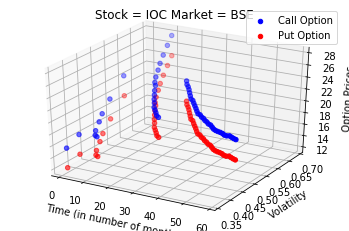

		Stock : ITC Market : BSE
Historical Volatility =  0.1846213526698629
Call Price = [1.4430e+02 1.1683e+02 8.9380e+01 6.2250e+01 3.7300e+01 1.8220e+01
 7.0800e+00 2.2100e+00 5.6000e-01 1.2000e-01 2.0000e-02]
Put Price = [0.0000e+00 0.0000e+00 2.0000e-02 3.6000e-01 2.8700e+00 1.1260e+01
 2.7600e+01 5.0190e+01 7.6020e+01 1.0305e+02 1.3042e+02]




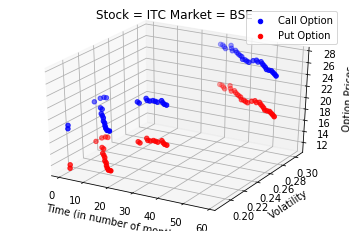

		Stock : LUPIN Market : BSE
Historical Volatility =  0.25729316420726817
Call Price = [433.24 350.82 269.12 191.2  123.33  71.54  37.4   17.78   7.79   3.18
   1.23]
Put Price = [0.0000e+00 5.0000e-02 8.2000e-01 5.3800e+00 1.9980e+01 5.0660e+01
 9.8990e+01 1.6185e+02 2.3433e+02 3.1219e+02 3.9271e+02]




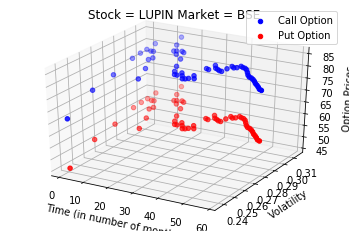

		Stock : M&M Market : BSE
Historical Volatility =  0.2911245275595171
Call Price = [411.78 333.57 256.69 184.69 122.92  75.47  42.94  22.83  11.46   5.48
   2.52]
Put Price = [1.0000e-02 1.8000e-01 1.6900e+00 8.0800e+00 2.4690e+01 5.5630e+01
 1.0149e+02 1.5976e+02 2.2677e+02 2.9918e+02 3.7460e+02]




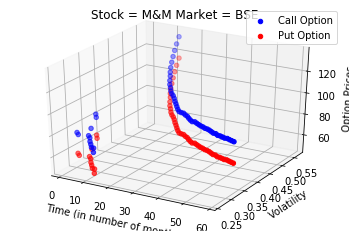

		Stock : MAHABANK Market : BSE
Historical Volatility =  0.5316142070390872
Call Price = [7.67 6.32 5.09 4.02 3.12 2.38 1.8  1.35 1.   0.74 0.54]
Put Price = [0.04 0.15 0.37 0.75 1.3  2.01 2.88 3.88 4.99 6.18 7.44]




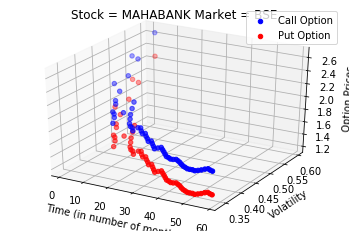

		Stock : NTPC Market : BSE
Historical Volatility =  0.2456098091947936
Call Price = [76.16 61.67 47.27 33.45 21.33 12.1   6.11  2.77  1.14  0.44  0.16]
Put Price = [0.000e+00 1.000e-02 1.000e-01 7.800e-01 3.160e+00 8.430e+00 1.693e+01
 2.809e+01 4.097e+01 5.476e+01 6.898e+01]




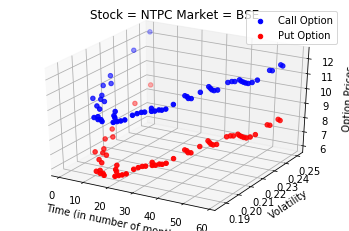

		Stock : SBIN Market : BSE
Historical Volatility =  0.20734423437060684
Call Price = [1.5147e+02 1.2264e+02 9.3860e+01 6.5680e+01 4.0290e+01 2.0960e+01
 9.1500e+00 3.3900e+00 1.0800e+00 3.1000e-01 8.0000e-02]
Put Price = [0.0000e+00 0.0000e+00 5.0000e-02 7.1000e-01 4.1500e+00 1.3660e+01
 3.0690e+01 5.3760e+01 8.0290e+01 1.0835e+02 1.3695e+02]




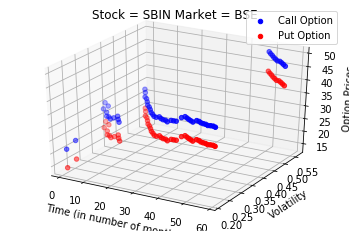

		Stock : SHREECEM Market : BSE
Historical Volatility =  0.26754174202849373
Call Price = [8818.75 7141.66 5482.94 3909.81 2546.62 1504.74  808.96  399.32  183.11
   78.94   32.34]
Put Price = [4.00000e-02 1.69000e+00 2.17200e+01 1.27340e+02 4.42900e+02 1.07976e+03
 2.06273e+03 3.33183e+03 4.79437e+03 6.36895e+03 8.00110e+03]




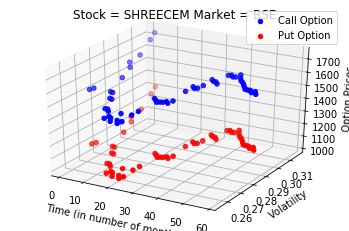

		Stock : TCS Market : BSE
Historical Volatility =  0.1729911714041277
Call Price = [9.7015e+02 7.8547e+02 6.0084e+02 4.1772e+02 2.4734e+02 1.1648e+02
 4.2110e+01 1.1730e+01 2.5900e+00 4.7000e-01 7.0000e-02]
Put Price = [0.0000e+00 0.0000e+00 5.0000e-02 1.6100e+00 1.5910e+01 6.9730e+01
 1.8004e+02 3.3434e+02 5.0988e+02 6.9244e+02 8.7672e+02]




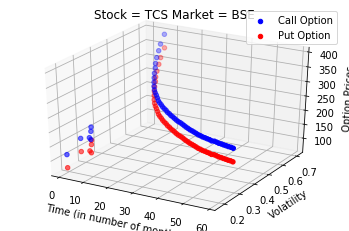

		Stock : ABB Market : NSE
Historical Volatility =  0.23218875040908418
Call Price = [684.88 554.53 424.74 299.28 188.31 103.88  50.12  21.36   8.17   2.85
   0.92]
Put Price = [0.0000e+00 2.0000e-02 6.2000e-01 5.5200e+00 2.4930e+01 7.0870e+01
 1.4749e+02 2.4911e+02 3.6629e+02 4.9134e+02 6.1979e+02]




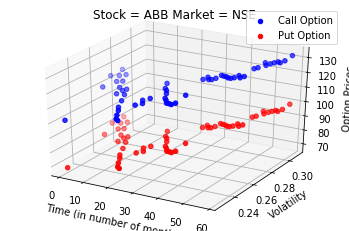

		Stock : AXISBANK Market : NSE
Historical Volatility =  0.24613044466769016
Call Price = [317.6  257.17 197.13 139.52  89.02  50.54  25.55  11.61   4.81   1.84
   0.66]
Put Price = [0.0000e+00 2.0000e-02 4.4000e-01 3.2900e+00 1.3250e+01 3.5240e+01
 7.0710e+01 1.1722e+02 1.7088e+02 2.2837e+02 2.8765e+02]




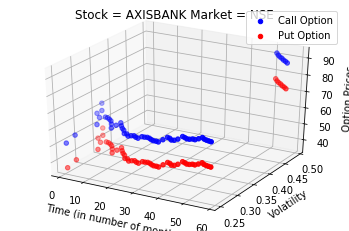

		Stock : BALMLAWRIE Market : NSE
Historical Volatility =  0.50978778624724
Call Price = [104.6   86.01  68.96  54.02  41.47  31.3   23.3   17.16  12.53   9.09
   6.57]
Put Price = [  0.44   1.67   4.46   9.35  16.62  26.28  38.11  51.79  66.99  83.38
 100.69]




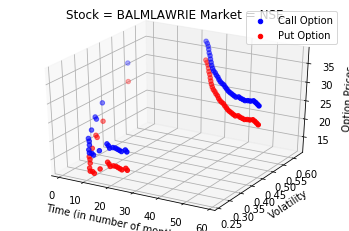

		Stock : BHARTIARTL Market : NSE
Historical Volatility =  0.3820157555020673
Call Price = [160.18 130.2  101.62  75.87  54.19  37.16  24.58  15.77   9.87   6.05
   3.65]
Put Price = [7.0000e-02 5.7000e-01 2.4700e+00 7.2000e+00 1.6000e+01 2.9440e+01
 4.7340e+01 6.9010e+01 9.3590e+01 1.2025e+02 1.4833e+02]




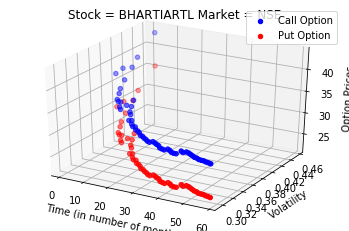

		Stock : CUMMINSIND Market : NSE
Historical Volatility =  0.3367077672653575
Call Price = [435.39 353.12 273.43 200.39 138.51  90.45  56.1   33.27  19.    10.52
   5.68]
Put Price = [5.0000e-02 6.5000e-01 3.8400e+00 1.3670e+01 3.4660e+01 6.9470e+01
 1.1799e+02 1.7804e+02 2.4664e+02 3.2103e+02 3.9907e+02]




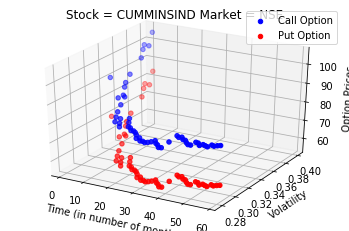

		Stock : EMAMILTD Market : NSE
Historical Volatility =  0.33178811085067444
Call Price = [215.26 174.55 135.06  98.78  68.01  44.15  27.16  15.95   9.     4.92
   2.62]
Put Price = [2.0000e-02 2.9000e-01 1.7700e+00 6.4600e+00 1.6670e+01 3.3780e+01
 5.7760e+01 8.7520e+01 1.2155e+02 1.5844e+02 1.9711e+02]




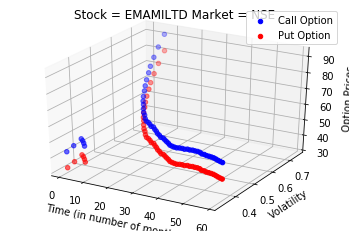

		Stock : GODREJIND Market : NSE
Historical Volatility =  0.2363949204141693
Call Price = [279.97 226.69 173.67 122.53  77.42  43.1   21.1    9.18   3.6    1.29
   0.43]
Put Price = [0.0000e+00 1.0000e-02 2.9000e-01 2.4400e+00 1.0640e+01 2.9600e+01
 6.0910e+01 1.0228e+02 1.4999e+02 2.0098e+02 2.5342e+02]




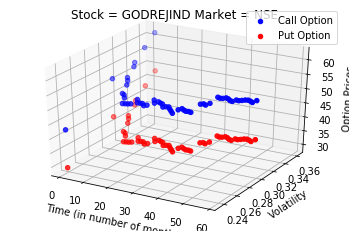

		Stock : HDFCBANK Market : NSE
Historical Volatility =  0.1604171356629825
Call Price = [1.08704e+03 8.80110e+02 6.73200e+02 4.67320e+02 2.73330e+02 1.23260e+02
 4.06700e+01 9.81000e+00 1.79000e+00 2.60000e-01 3.00000e-02]
Put Price = [0.0000e+00 0.0000e+00 2.0000e-02 1.0700e+00 1.4010e+01 7.0870e+01
 1.9522e+02 3.7129e+02 5.7020e+02 7.7560e+02 9.8230e+02]




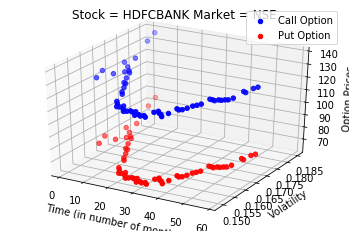

		Stock : HEROMOTOCO Market : NSE
Historical Volatility =  0.3357726068524632
Call Price = [1590.63 1290.01  998.76  731.68  505.36  329.64  204.14  120.84   68.87
   38.05   20.49]
Put Price = [1.80000e-01 2.33000e+00 1.38300e+01 4.95100e+01 1.25960e+02 2.53000e+02
 4.30250e+02 6.49720e+02 9.00510e+02 1.17244e+03 1.45765e+03]




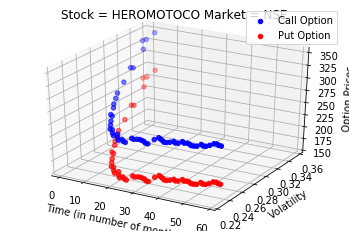

		Stock : HINDUNILVR Market : NSE
Historical Volatility =  0.2409514009820285
Call Price = [932.29 754.87 578.46 408.71 259.44 145.78  72.48  32.19  12.96   4.8
   1.66]
Put Price = [0.0000e+00 5.0000e-02 1.1100e+00 8.8300e+00 3.7040e+01 1.0085e+02
 2.0502e+02 3.4221e+02 5.0045e+02 6.6977e+02 8.4410e+02]




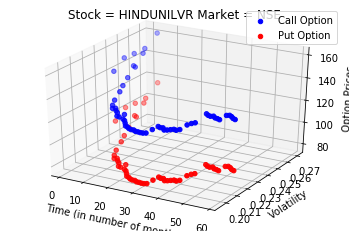

		Stock : INFY Market : NSE
Historical Volatility =  0.2630940406646563
Call Price = [337.61 273.4  209.82 149.38  96.89  56.8   30.17  14.66   6.59   2.78
   1.11]
Put Price = [0.0000e+00 5.0000e-02 7.5000e-01 4.5700e+00 1.6350e+01 4.0530e+01
 7.8170e+01 1.2693e+02 1.8313e+02 2.4358e+02 3.0618e+02]




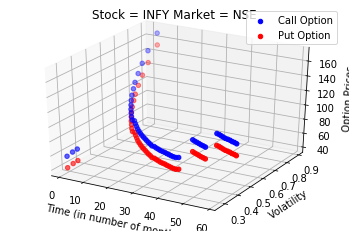

		Stock : IOC Market : NSE
Historical Volatility =  0.3676042803056978
Call Price = [70.24 57.04 44.4  32.96 23.31 15.75 10.23  6.42  3.91  2.33  1.36]
Put Price = [2.000e-02 1.900e-01 9.200e-01 2.840e+00 6.560e+00 1.237e+01 2.021e+01
 2.977e+01 4.063e+01 5.241e+01 6.481e+01]




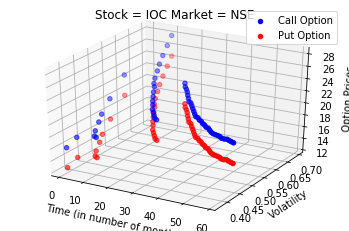

		Stock : ITC Market : NSE
Historical Volatility =  0.1776490322194474
Call Price = [1.4430e+02 1.1683e+02 8.9370e+01 6.2180e+01 3.6990e+01 1.7680e+01
 6.5900e+00 1.9200e+00 4.5000e-01 9.0000e-02 1.0000e-02]
Put Price = [0.0000e+00 0.0000e+00 1.0000e-02 2.8000e-01 2.5700e+00 1.0730e+01
 2.7100e+01 4.9910e+01 7.5910e+01 1.0301e+02 1.3041e+02]




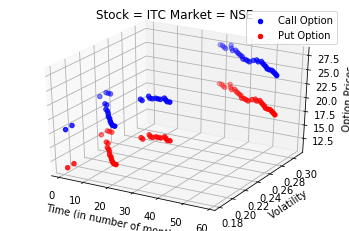

		Stock : LUPIN Market : NSE
Historical Volatility =  0.26948005723128615
Call Price = [432.58 350.32 269.   191.96 125.26  74.26  40.13  19.94   9.22   4.01
   1.66]
Put Price = [0.0000e+00 9.0000e-02 1.1200e+00 6.4200e+00 2.2070e+01 5.3410e+01
 1.0162e+02 1.6378e+02 2.3541e+02 3.1255e+02 3.9254e+02]




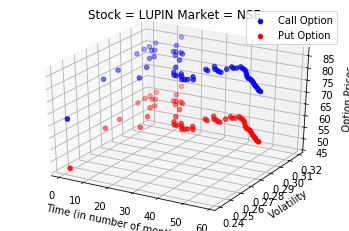

		Stock : M&M Market : NSE
Historical Volatility =  0.29730785531956333
Call Price = [411.86 333.67 256.96 185.33 124.01  76.85  44.32  23.97  12.28   6.01
   2.83]
Put Price = [1.0000e-02 2.2000e-01 1.9100e+00 8.6900e+00 2.5770e+01 5.7010e+01
 1.0287e+02 1.6093e+02 2.2763e+02 2.9976e+02 3.7499e+02]




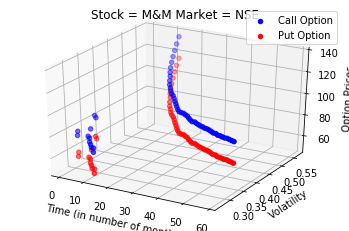

		Stock : MAHABANK Market : NSE
Historical Volatility =  0.5584213685952092
Call Price = [7.69 6.36 5.15 4.1  3.22 2.49 1.91 1.46 1.1  0.83 0.63]
Put Price = [0.06 0.18 0.43 0.83 1.4  2.12 3.   4.   5.1  6.28 7.53]




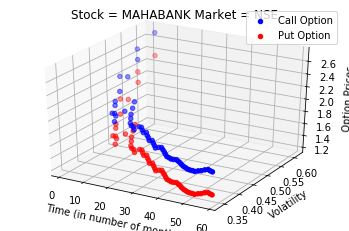

		Stock : NTPC Market : NSE
Historical Volatility =  0.2420666111229389
Call Price = [76.37 61.83 47.39 33.49 21.28 11.99  5.98  2.67  1.08  0.4   0.14]
Put Price = [ 0.    0.    0.09  0.74  3.07  8.31 16.84 28.06 41.01 54.87 69.15]




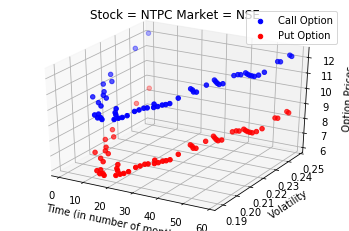

		Stock : SBIN Market : NSE
Historical Volatility =  0.19956783152418642
Call Price = [1.5160e+02 1.2274e+02 9.3920e+01 6.5610e+01 3.9920e+01 2.0350e+01
 8.5700e+00 3.0000e+00 9.0000e-01 2.3000e-01 5.0000e-02]
Put Price = [0.0000e+00 0.0000e+00 4.0000e-02 5.8000e-01 3.7500e+00 1.3040e+01
 3.0120e+01 5.3420e+01 8.0170e+01 1.0837e+02 1.3705e+02]




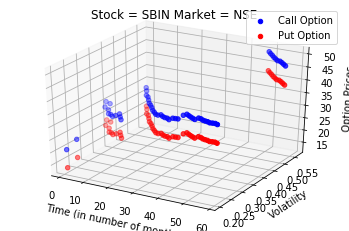

		Stock : SHREECEM Market : NSE
Historical Volatility =  0.2683225132787214
Call Price = [8830.87 7151.53 5490.88 3916.6  2552.91 1510.5   813.72  402.76  185.3
   80.19   33.  ]
Put Price = [4.00000e-02 1.75000e+00 2.21600e+01 1.28930e+02 4.46300e+02 1.08494e+03
 2.06921e+03 3.33931e+03 4.80290e+03 6.37884e+03 8.01271e+03]




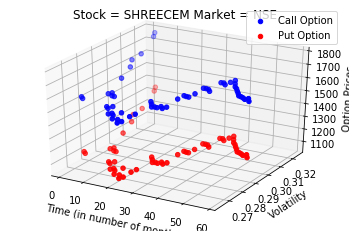

		Stock : TCS Market : NSE
Historical Volatility =  0.17549101992180124
Call Price = [9.6989e+02 7.8526e+02 6.0069e+02 4.1776e+02 2.4799e+02 1.1774e+02
 4.3270e+01 1.2370e+01 2.8200e+00 5.3000e-01 9.0000e-02]
Put Price = [0.0000e+00 0.0000e+00 6.0000e-02 1.7600e+00 1.6620e+01 7.1000e+01
 1.8116e+02 3.3489e+02 5.0998e+02 6.9232e+02 8.7650e+02]




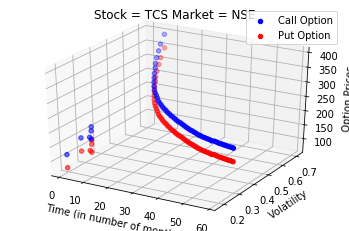

In [13]:
for i, market in enumerate(market_name):
    for j, stock in enumerate(stock_name):
        model(stock, market, num_fig=0)